In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, ensemble

In [3]:
today = datetime.today().strftime('%Y-%m-%d')
start_date = '2010-01-01'
data = yf.download('ETH-USD',start_date, today)
data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-03,2950.156738,2964.673340,2797.319336,2834.468994,2834.468994,13091199728
2022-03-04,2834.987305,2835.176270,2587.748291,2617.156006,2617.156006,14496939024
2022-03-05,2618.473633,2679.102539,2596.989990,2664.831055,2664.831055,8072368396
2022-03-06,2664.943604,2673.637207,2555.037354,2555.037354,2555.037354,8872976607
2022-03-07,2554.883301,2639.243896,2455.593750,2455.593750,2455.593750,13887868928


In [4]:
data.reset_index(inplace=True)
data_training = data[data['Date']< '2020-01-01'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...,...
778,2019-12-27,126.368797,128.097565,124.820808,127.214607,127.214607,8299390176
779,2019-12-28,127.213013,130.258163,126.899696,128.322708,128.322708,8069298610
780,2019-12-29,128.266876,136.811203,127.997658,134.757980,134.757980,9708776786
781,2019-12-30,134.796524,136.757355,131.545563,132.633484,132.633484,9796951716


In [5]:
data_test = data[data['Date']< '2020-01-01'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...,...
778,2019-12-27,126.368797,128.097565,124.820808,127.214607,127.214607,8299390176
779,2019-12-28,127.213013,130.258163,126.899696,128.322708,128.322708,8069298610
780,2019-12-29,128.266876,136.811203,127.997658,134.757980,134.757980,9708776786
781,2019-12-30,134.796524,136.757355,131.545563,132.633484,132.633484,9796951716


In [6]:
training_data = data_training.drop(['Date', 'Adj Close'], axis = 1)
training_data.head()

,Open,High,Low,Close,Volume
0,308.644989,329.451996,307.056000,320.884003,893249984
1,320.670990,324.717987,294.541992,299.252991,885985984
2,298.585999,319.453003,298.191986,314.681000,842300992
3,314.690002,319.153015,298.513000,307.907990,1613479936
4,307.024994,328.415009,307.024994,316.716003,1041889984


In [7]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.17085383, 0.18115214, 0.18565298, 0.18030149, 0.01505105],
       [0.18001161, 0.17763905, 0.17529173, 0.16381584, 0.01464839],
       [0.16319392, 0.17373194, 0.17831382, 0.175574  , 0.01222679],
       ...,
       [0.03349617, 0.03819446, 0.03739766, 0.03844923, 0.50372386],
       [0.03846849, 0.0381545 , 0.04033522, 0.03683009, 0.50861167],
       [0.03680519, 0.03590991, 0.03806045, 0.03452645, 0.4609344 ]])

In [8]:
X_train = [] 
Y_train = []
training_data.shape[0]
for i in range(60, training_data.shape[0]):
    X_train.append(training_data[i-60:i])
    Y_train.append(training_data[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train.shape

(723, 60, 5)

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
#Initialize the RNN
model = Sequential() 
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
model.add(Dropout(0.2)) 
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3)) 
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4)) 
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5)) 
model.add(Dense(units =1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            11200     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [10]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history= model.fit(X_train, Y_train, epochs = 20, batch_size =50, validation_split=0.1)

Epoch 1/20
13/13 [==============================] - 4s 308ms/step - loss: 0.0515 - val_loss: 0.0220
Epoch 2/20
13/13 [==============================] - 4s 325ms/step - loss: 0.0149 - val_loss: 9.4362e-04
Epoch 3/20
13/13 [==============================] - 4s 307ms/step - loss: 0.0129 - val_loss: 4.0416e-04
Epoch 4/20
13/13 [==============================] - 4s 303ms/step - loss: 0.0092 - val_loss: 4.9017e-04
Epoch 5/20
13/13 [==============================] - 3s 196ms/step - loss: 0.0084 - val_loss: 3.2726e-04
Epoch 6/20
13/13 [==============================] - 3s 205ms/step - loss: 0.0072 - val_loss: 2.0307e-04
Epoch 7/20
13/13 [==============================] - 2s 191ms/step - loss: 0.0060 - val_loss: 3.0261e-04
Epoch 8/20
13/13 [==============================] - 3s 212ms/step - loss: 0.0059 - val_loss: 4.3876e-04
Epoch 9/20
13/13 [==============================] - 3s 212ms/step - loss: 0.0068 - val_loss: 4.5902e-04
Epoch 10/20
13/13 [==============================] - 3s 220ms/step -

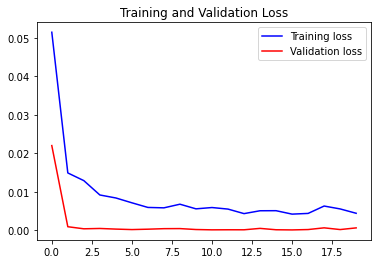

In [11]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [12]:
part_60_days = data_training.tail(60)
df= part_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,184.018158,185.708954,182.797668,183.925720,8087991830
1,183.994827,185.024216,179.818146,182.425018,8760247744
2,182.319031,188.022934,181.821609,186.355194,10551917945
3,186.309311,191.257828,184.331985,189.304169,10024177342
4,189.113495,193.547256,188.667679,191.593842,10156458684


In [13]:
inputs = scaler.transform(df) 
inputs

array([[0.07595069, 0.07448121, 0.08277054, 0.07592145, 0.41387857],
       [0.07593292, 0.07397307, 0.08030358, 0.07477772, 0.45114386],
       [0.0746568 , 0.07619841, 0.08196239, 0.07777302, 0.55046186],
       ...,
       [0.03349617, 0.03819446, 0.03739766, 0.03844923, 0.50372386],
       [0.03846849, 0.0381545 , 0.04033522, 0.03683009, 0.50861167],
       [0.03680519, 0.03590991, 0.03806045, 0.03452645, 0.4609344 ]])

In [14]:
X_test = []
Y_test = []
for i in range (60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    Y_test.append(inputs[i, 0])
X_test, Y_test = np.array(X_test), np.array(Y_test) 
X_test.shape, Y_test.shape
Y_pred = model.predict(X_test) 
Y_pred, Y_test
scaler.scale_

array([7.61498463e-04, 7.42094507e-04, 8.27972153e-04, 7.62130209e-04,
       5.54331933e-11])

In [15]:
scale = 1/5.18164146e-05
Y_test = Y_test*scale
Y_pred = Y_pred*scale
Y_pred

array([[ 1427.1796 ],
       [ 1430.2847 ],
       [ 1437.6685 ],
       [ 1453.7146 ],
       [ 1483.5602 ],
       [ 1532.7213 ],
       [ 1606.5623 ],
       [ 1708.5519 ],
       [ 1838.9645 ],
       [ 1994.8776 ],
       [ 2171.8306 ],
       [ 2366.0002 ],
       [ 2573.485  ],
       [ 2789.622  ],
       [ 3010.128  ],
       [ 3234.0435 ],
       [ 3465.915  ],
       [ 3712.0967 ],
       [ 3974.4294 ],
       [ 4251.962  ],
       [ 4539.6567 ],
       [ 4826.3066 ],
       [ 5097.058  ],
       [ 5341.453  ],
       [ 5554.6504 ],
       [ 5735.1    ],
       [ 5883.6396 ],
       [ 6002.6045 ],
       [ 6091.552  ],
       [ 6149.6836 ],
       [ 6179.979  ],
       [ 6190.503  ],
       [ 6185.9272 ],
       [ 6174.3564 ],
       [ 6179.6304 ],
       [ 6231.5737 ],
       [ 6353.637  ],
       [ 6550.2114 ],
       [ 6815.2036 ],
       [ 7136.2153 ],
       [ 7502.758  ],
       [ 7911.8794 ],
       [ 8353.185  ],
       [ 8812.269  ],
       [ 9248.694  ],
       [ 9

In [16]:
Y_test

array([3.29729158e+03, 3.47402672e+03, 3.14946380e+03, 3.38612962e+03,
       3.27348399e+03, 3.41659457e+03, 3.72816612e+03, 3.66172517e+03,
       3.61358078e+03, 3.64022506e+03, 3.86685325e+03, 3.96521405e+03,
       4.16139208e+03, 4.05659457e+03, 4.36707853e+03, 4.82356851e+03,
       5.75199354e+03, 5.60941217e+03, 5.69107842e+03, 5.82315214e+03,
       5.71679657e+03, 5.09859090e+03, 5.30424819e+03, 5.62230085e+03,
       5.57606657e+03, 5.61058766e+03, 5.67289937e+03, 5.55988644e+03,
       5.02737354e+03, 5.15405418e+03, 5.48258488e+03, 5.70956603e+03,
       5.23295729e+03, 6.43697832e+03, 8.23901226e+03, 9.05740770e+03,
       8.99541935e+03, 8.84575501e+03, 8.99337693e+03, 9.36805356e+03,
       1.04286555e+04, 1.09226642e+04, 1.08156772e+04, 1.08510504e+04,
       8.77409634e+03, 9.36859713e+03, 9.03207166e+03, 9.97996918e+03,
       1.01504434e+04, 9.96289252e+03, 9.64223817e+03, 9.83954819e+03,
       9.22814654e+03, 9.86808823e+03, 1.01118814e+04, 1.17821502e+04,
      

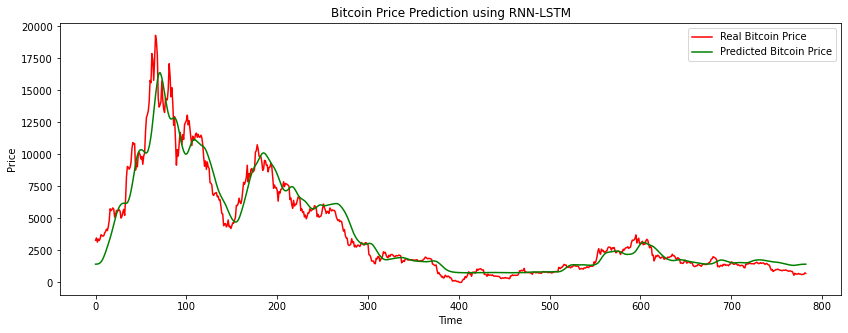

In [17]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [20]:
Y_pred

array([[ 1427.1796 ],
       [ 1430.2847 ],
       [ 1437.6685 ],
       [ 1453.7146 ],
       [ 1483.5602 ],
       [ 1532.7213 ],
       [ 1606.5623 ],
       [ 1708.5519 ],
       [ 1838.9645 ],
       [ 1994.8776 ],
       [ 2171.8306 ],
       [ 2366.0002 ],
       [ 2573.485  ],
       [ 2789.622  ],
       [ 3010.128  ],
       [ 3234.0435 ],
       [ 3465.915  ],
       [ 3712.0967 ],
       [ 3974.4294 ],
       [ 4251.962  ],
       [ 4539.6567 ],
       [ 4826.3066 ],
       [ 5097.058  ],
       [ 5341.453  ],
       [ 5554.6504 ],
       [ 5735.1    ],
       [ 5883.6396 ],
       [ 6002.6045 ],
       [ 6091.552  ],
       [ 6149.6836 ],
       [ 6179.979  ],
       [ 6190.503  ],
       [ 6185.9272 ],
       [ 6174.3564 ],
       [ 6179.6304 ],
       [ 6231.5737 ],
       [ 6353.637  ],
       [ 6550.2114 ],
       [ 6815.2036 ],
       [ 7136.2153 ],
       [ 7502.758  ],
       [ 7911.8794 ],
       [ 8353.185  ],
       [ 8812.269  ],
       [ 9248.694  ],
       [ 9